## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [76]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [77]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 

(50000, 32, 32, 3)


In [78]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

/Users/shandawun/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


/Users/shandawun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
/Users/shandawun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


Epoch 1/50
50000/50000 [==============================] - 30s 592us/step - loss: 1.3104 - accuracy: 0.5334
Epoch 2/50
50000/50000 [==============================] - 28s 565us/step - loss: 0.9225 - accuracy: 0.6744
Epoch 3/50
50000/50000 [==============================] - 28s 567us/step - loss: 0.7680 - accuracy: 0.7298
Epoch 4/50
50000/50000 [==============================] - 28s 570us/step - loss: 0.6494 - accuracy: 0.7710
Epoch 5/50
50000/50000 [==============================] - 29s 573us/step - loss: 0.5395 - accuracy: 0.8119
Epoch 6/50
50000/50000 [==============================] - 29s 572us/step - loss: 0.4402 - accuracy: 0.8451
Epoch 7/50
50000/50000 [==============================] - 29s 576us/step - loss: 0.3559 - accuracy: 0.8777
Epoch 8/50
50000/50000 [==============================] - 29s 575us/step - loss: 0.2764 - accuracy: 0.9044
Epoch 9/50
50000/50000 [==============================] - 29s 574us/step - loss: 0.2159 - accuracy: 0.9248
Epoch 10/50
50000/50000 [============

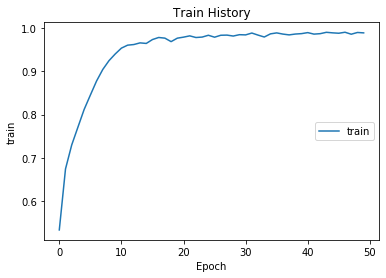

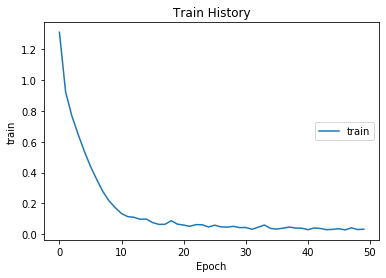

In [79]:
classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(
    filters=16, 
    kernel_size=(3,3), 
    padding='same', 
    input_shape=(32,32,3), 
    activation='relu')
)
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))
#32,3,3,input_shape=(32,32,3),activation='relu''

#卷積組合
classifier.add(Convolution2D(
    filters=32, 
    kernel_size=(3,3), 
    padding='same',  
    activation='relu')
)
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(output_dim=100,activation='relu')) #output_dim=100,activation=relu'自己設計FC層參數'

#輸出
classifier.add(Dense(output_dim=10,activation='softmax'))#輸出函數應該用什麼？

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train_history = classifier.fit(x_train,y_train,batch_size=100,epochs=50)
classifier.summary()

def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()
               
show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')


## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [80]:
input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
y_pred = classifier.predict(input_example)
scores = classifier.evaluate(x_test, y_test)
scores[1]

10000/10000 [==============================] - 2s 249us/step


0.6753000020980835